## Libear Regression & Logistic Regression

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  
import statsmodels.api as sm # 통계학적인 학습 

In [6]:
whitedata = pd.read_csv("white.csv")   # dataframe
whitedata.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
y      0
dtype: int64

In [7]:
whitedata.head()  # whitedata.tail() # 수치데이터로만 구성

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Linear Regression 

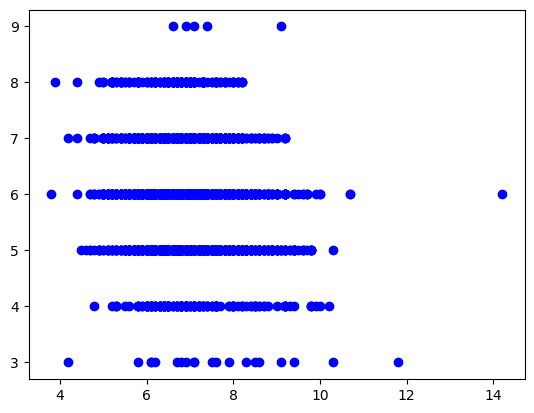

In [8]:
y = whitedata.y  # whitedata["y"] 같은의미 -> 반응변수
x = whitedata.x1 # 설명변수
plt.scatter(x,y,color="blue"); plt.show()       # 산점도 -> 시각화 : 음의 기울기를 가짐 

In [9]:
x = whitedata["x1"].to_frame() # 설명변수 1개를 가져옴 , 시리즈를 데이터프레임으로 변환
y = whitedata.y

In [10]:
slm = LinearRegression().fit(x,y) # linear regression에 적합시킴       
w, b = slm.coef_[0], slm.intercept_ #codf = B1, intercept = B0
print(w,b)

-0.1192889886319587 6.695610039009974


In [11]:
x0, x1 = x["x1"].min(), x["x1"].max() # 최소값과 최대값을 구함 
print(x0, x1)

3.8 14.2


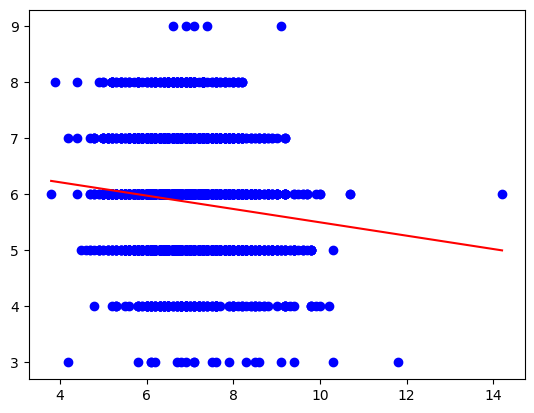

In [12]:
plt.scatter(x,y,color="blue")
plt.plot([x0,x1],[w*x0+b,w*x1+b],'r'); plt.show() # 기울기에 맞는 선을 추가

In [13]:
model = sm.OLS(y, sm.add_constant(x))   # sm.OLS(y,x)와 비교 => x만 집어넣으면 B0를 계산하지 않음
results = model.fit()   # sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary()) # 위와 다르게 설명력 있는 모델임을 확인 할 수 있음 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     64.08
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.48e-15
Time:                        15:04:26   Log-Likelihood:                -6322.8
No. Observations:                4898   AIC:                         1.265e+04
Df Residuals:                    4896   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6956      0.103     65.057      0.0

In [14]:
## Multiple linear regression # 다중 선형 회귀
X = whitedata.drop(["y"],axis=1)
y = whitedata["y"]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [16]:
lrm = LinearRegression(n_jobs=-1)      # fit_intercept=True  # -1: 지금있는 모든 core를 모두 사용하라는 뜻
result = lrm.fit(X_train, y_train) 
print(result.coef_)

[ 8.00846101e-02 -1.70374343e+00  5.69767648e-02  8.17351234e-02
 -1.64381383e-02  4.96141486e-03 -4.74149230e-04 -1.48223181e+02
  7.49786197e-01  7.33900620e-01  2.08766177e-01]


In [17]:
print(result.feature_names_in_)

['x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11']


In [18]:
forecast = lrm.predict(X_test)
print(forecast[0:10])

[6.13867211 4.87485387 5.80282258 6.02253147 6.30505131 6.55048122
 5.98089896 6.06284824 5.56466996 5.94534116]


In [19]:
accuracy = lrm.score(X_test, y_test)    # 결정계수 Y hat 과 Y를 비교하여 정확도를 비교
print(accuracy) # 정확도가 낮다고 판단할 수 있음

0.2480396226265077


In [20]:
model = sm.OLS(y_train, sm.add_constant(X_train)) 
results = model.fit()  
print(results.summary())  #결과 확인

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     129.1
Date:                Mon, 22 May 2023   Prob (F-statistic):          3.70e-248
Time:                        15:04:27   Log-Likelihood:                -3878.0
No. Observations:                3428   AIC:                             7780.
Df Residuals:                    3416   BIC:                             7854.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.5394     21.311      6.923      0.0

### LASSO, Ridge regression

- Elastic net
$$ \min_{\beta \in R^p} \left\{ ||y- X \beta||_2^2 + \lambda_1 ||\beta||_1 + \lambda_2 ||\beta||_2^2 \right\} $$
- Lasso : $\lambda_2 = 0$
- Ridge : $\lambda_1 = 0$

In [21]:
## 다음에 시작 
from sklearn.linear_model import Lasso, Ridge

In [22]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)  # alpha=0: OLS

In [23]:
lasso.fit(X_train, y_train)
print(lasso.intercept_ , lasso.coef_ )# 추정한 값이 0.1보다 더 작으면 기각시킴

3.1350119050228873 [-0.         -0.          0.          0.00658765 -0.          0.00931903
 -0.0026721  -0.          0.          0.          0.26000292]


In [24]:
forecast = lasso.predict(X_test) # 테스트 데이터로 예측함
print(forecast[0:10])

[5.98542298 5.39795764 5.75828732 5.94075017 6.3486235  6.35493312
 5.74667097 6.083002   5.67070478 5.79674228]


In [25]:
## training-validation procedure(반복 with train-test-split) # 무작위로 10번 test # 설명변수가 많은경우 모델을 fitting하면서 설명변수를 선택할 때 사용, 약간의 bias가 발생할 수 있다.
from sklearn.metrics import mean_squared_error
result = np.zeros((10,5))
a = [0.001, 0.002, 0.003, 0.004, 0.005] # 유의수준 지정 -> 0.001을 선택하는 것이 좋음 
for step in range(10):
    X0, X1, y0, y1 = train_test_split(X, y, test_size=0.3)
    for choice in range(len(a)):
        lasso = Lasso(alpha=a[choice])      # sklearn.preprocessing.StandardScaler
        lasso.fit(X0, y0); forecast = lasso.predict(X1)
        result[step,choice] = mean_squared_error(y1,forecast)
print(result)

[[0.57998542 0.57993849 0.58026641 0.58096906 0.58204652]
 [0.60919867 0.60964528 0.61048226 0.61134903 0.61251897]
 [0.60091517 0.60073638 0.60097051 0.60161758 0.60267759]
 [0.59410275 0.59459949 0.59552597 0.59688219 0.59866819]
 [0.57863237 0.57832669 0.57840395 0.57886158 0.57970142]
 [0.54396721 0.54452774 0.54550652 0.5469035  0.54863308]
 [0.55135949 0.55188251 0.55279163 0.55408688 0.55547655]
 [0.56200709 0.561993   0.56253328 0.56350646 0.56486984]
 [0.55846186 0.55889092 0.55976527 0.56108471 0.56284697]
 [0.57317467 0.57519277 0.57762293 0.58046507 0.5835661 ]]


In [26]:
result = pd.DataFrame(result)
result.mean()

0    0.575180
1    0.575573
2    0.576387
3    0.577573
4    0.579101
dtype: float64

In [27]:
##5.22수업내용 업데이트 

### Logistic Regression

In [28]:
whitedata["good"] = (whitedata.y > 5).astype(float) #good 칼럼의 데이터만 가져옴

y_binary = whitedata["good"] #target value
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=100)

In [29]:
# statmodels - sm에서 함수 사용 
logit_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.508625
         Iterations 8


In [30]:
print(logit_sm.summary()) #logisitic regression 결과를 표로 작성 #X1는 필요없고 그 나머지는 유의하다고 할 수 있음

                           Logit Regression Results                           
Dep. Variable:                   good   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3416
Method:                           MLE   Df Model:                           11
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2100
Time:                        15:06:52   Log-Likelihood:                -1743.6
converged:                       True   LL-Null:                       -2206.9
Covariance Type:            nonrobust   LLR p-value:                1.101e-191
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.1746     77.031      2.625      0.009      51.196     353.153
x1             0.0022      0.083      0.026      0.979      -0.160       0.164
x2            -5.8583      0.487    -12.033      0.0

In [32]:
print("Parameters:",logit_sm.params)# 파라미터 출력
print("Eta:", logit_sm.fittedvalues[0:10])# 70%(training data) 중에 제일먼저 뽑힌 데이터 번호가 1044! 확률이 0.5이상이면 좋고 이하면 나쁨


Parameters: const    202.174579
x1         0.002172
x2        -5.858328
x3         0.164871
x4         0.149811
x5         0.985393
x6         0.011172
x7        -0.002212
x8      -215.010948
x9         1.034857
x10        2.381093
x11        0.801961
dtype: float64
Eta: 1044    1.135539
3224    2.072523
2808   -0.131601
3382    2.380944
295    -0.762854
728     1.427865
4772   -0.486029
4053   -0.015095
361    -1.930199
1466    1.976535
dtype: float64


In [33]:
muhat = logit_sm.predict(sm.add_constant(X_test)) #새로운 데이터로 타겟값을 예측 
print("prob:", muhat[0:10])# 뮤값 즉 모평균의값을 출력함 , 0.5이상이면 good 이하면 bad

prob: 828     0.871299
1621    0.131395
3091    0.633535
2010    0.793015
1433    0.876213
1101    0.943365
3349    0.782047
2262    0.800305
4600    0.524013
1318    0.772940
dtype: float64


In [34]:
yhat = (muhat > 0.5).astype(int) # true =1, false=0 # y예측값을 구함
print(yhat[0:10])

828     1
1621    0
3091    1
2010    1
1433    1
1101    1
3349    1
2262    1
4600    1
1318    1
dtype: int32


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, yhat) #정확도 매트릭스를 사용하여 y의 테스트값과, 예측값인 yhat 값 비교
print ("Confusion Matrix : \n", cm) 
##TP FN   (실제 x 예측)
##FP TN

Confusion Matrix : 
 [[238 222]
 [151 859]]


In [36]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, yhat)) # 정확도 출력 

Test accuracy =  0.7462585034013606


In [39]:
## 변수지정 fomula.api  ## 이방법이 모델링하기 쉽기 때문에 많이 사용!
##공부할것 : 상호작용을 하기 위해서는 어떤 모델을 생성할 필요가 있나? ->파이널 프로젝트 
import statsmodels.formula.api as smf # 직접 데이터의 모델을 설정
model = "good ~ x2+x4+x6+x10+x11" #칼럼 X1~X11을 사용해여 모델 생성
logit_smf = smf.logit(formula=str(model),data=whitedata).fit()
logit_smf.summary() ##logistic regression의 결과를 표로 출력 

Optimization terminated successfully.
         Current function value: 0.507797
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   good   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4892
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2035
Time:                        15:21:58   Log-Likelihood:                -2487.2
converged:                       True   LL-Null:                       -3122.7
Covariance Type:            nonrobust   LLR p-value:                1.207e-272
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9599      0.479    -20.797      0.000     -10.899      -9.021
x2            -6.7043      0.394    -17.011      0.000      -7.477      -5.932
x4             0.0654      0.008      8.407      0.000       0.050       0.081
x6             0.0092      0.002      4.148      0.000       0.005       0.014
x10            1.3013      0.331      3.935      0.000       0.653       1.949
x11            1.0799      0.041     26.567      0.000       1.000       1.160
==============================================================================
"""

In [40]:
#sklearn : “statsmodels”과 다른 설정
#sklearn사용 !
from sklearn.linear_model import LogisticRegression

In [41]:
logitS = LogisticRegression(penalty=None)  ## C=1/alpha=1, penality="l2" {"l1","l2","elasticnet",None}
logitS.fit(X_train, y_train)  #기본적으로 분석할 때 1을 포함   

C:\Users\SM-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [42]:
print(logitS.coef_, logitS.intercept_)     #상관계수와 B0 값 출력, 위 모델의 coef값과 비교  

[[-2.65831808e-01 -6.60393173e+00 -4.55204322e-01  6.10587409e-02
  -5.53974022e-01  1.10710499e-02 -2.68518619e-03 -2.40885588e+00
  -7.39746026e-01  2.20586985e+00  9.87125075e-01]] [-2.41690669]


#### The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
 - lbfgs’ - [‘l2’, None]

 - liblinear’ - [‘l1’, ‘l2’]
 - 'newton-cg’ - [‘l2’, None]
 - 'newton-cholesky’ - [‘l2’, None]
 - 'sag’ - [‘l2’, None]
 - 'saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

In [43]:
logitL = LogisticRegression(penalty="l1",solver="saga")  # LASSO , C = 1/alpha, solver를 saga로 적용 후 사용가능함, 라쏘는 기준값 이하로 내려가면 0으로 보내버림
logitL.fit(X_train, y_train)   

C:\Users\SM-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [44]:
muL = logitL.predict_proba(X_test) # 뮤 햇을 구하여 muL 생성 (예측 확률 구함)
yhat = logitL.predict(X_test)  # 예측값을 생성 
print(muL[0:10])
print(yhat[0:10]) #결과값은 0 ,1 로 표현 

[[0.24486208 0.75513792]
 [0.58471433 0.41528567]
 [0.36855233 0.63144767]
 [0.2565897  0.7434103 ]
 [0.16571528 0.83428472]
 [0.13910636 0.86089364]
 [0.28382279 0.71617721]
 [0.23968072 0.76031928]
 [0.4277204  0.5722796 ]
 [0.26209616 0.73790384]]
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
logitL.score(X_test, y_test)# 예측값의 정확도를 출력

##5.22일 수업 내용

0.6843537414965987

### 다범주 로짓 모형

In [46]:
from sklearn import datasets   
# iris data
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

In [ ]:
from statsmodels.discrete.discrete_model import MNLogit

In [ ]:
mlogit_sm = MNLogit(Y,sm.add_constant(X)).fit(maxiter=100,method="bfgs")
mlogit_sm.summary()

In [ ]:
prob = mlogit_sm.predict(sm.add_constant(X))
print(prob[0:10])

In [ ]:
yhat = np.argmax(prob,1)
print(yhat[0:10])

### LASSO with statsmodels

In [ ]:
mlogit_sm = MNLogit(Y,sm.add_constant(X))
mlogit_smL = mlogit_sm.fit_regularized(method="l1", alpha=0.5)
mlogit_smL.summary()

In [ ]:
yhatL = np.argmax(mlogit_smL.predict(sm.add_constant(X)),1)
print(yhatL[0:10])

In [ ]:
# Sklearn
mlogitR = LogisticRegression(C=1e5)  # multi_class="auto" {'ovr','multinomial','auto'}  
mlogitR.fit(X,Y)

In [ ]:
muR = mlogitR.predict_proba(X)
yhatR = np.argmax(muR,1)
print(muR[0:10])
print(yhatR[0:10])

In [ ]:
## 그림으로 표시
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mlogitR.predict(np.c_[xx.ravel(), yy.ravel()])
# put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max());  plt.ylim(yy.min(), yy.max())
plt.xticks(()); plt.yticks(())
plt.show()